In [1]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)
plt.style.use('seaborn-v0_8')

In [13]:
df = pd.read_csv('marketing_campaign_preprocessed.csv')
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes
df.drop('Dt_Customer', axis=1, inplace=True)
df['Response'] = df['Response'].map({'Yes': 1, 'No': 0})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Spending,Children
0,5524,1957,2,4,"58,138.00",0,0,58,635,88,...,0,0,0,0,3,11,1,66,1617,0
1,2174,1954,2,4,"46,344.00",1,1,38,11,1,...,0,0,0,0,3,11,0,69,27,2
2,4141,1965,2,5,"71,613.00",0,0,26,426,49,...,0,0,0,0,3,11,0,58,776,0
3,6182,1984,2,5,"26,646.00",1,0,26,11,4,...,0,0,0,0,3,11,0,39,53,1
4,5324,1981,4,3,"58,293.00",1,0,94,173,43,...,0,0,0,0,3,11,0,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,10870,1967,2,3,"61,223.00",0,1,46,709,43,...,0,0,0,0,3,11,0,56,1341,1
2198,4001,1946,4,5,"64,014.00",2,1,56,406,0,...,0,1,0,0,3,11,0,77,444,3
2199,7270,1981,2,2,"56,981.00",0,0,91,908,48,...,0,0,0,0,3,11,0,42,1241,0
2200,8235,1956,3,5,"69,245.00",0,1,8,428,30,...,0,0,0,0,3,11,0,67,843,1


# Classification

* Predict Response or not

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score


X = df.drop('Response', axis=1)
y = df['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LogisticRegression(max_iter=10000, solver='lbfgs', random_state=42)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# K fold cross validation and logistic regression
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Scores: ", scores)

Accuracy: 0.86 (+/- 0.02)
Scores:  [0.84580499 0.8707483  0.85454545 0.86818182 0.86590909]


              precision    recall  f1-score   support

           0       0.90      0.96      0.93       381
           1       0.56      0.32      0.40        60

    accuracy                           0.87       441
   macro avg       0.73      0.64      0.67       441
weighted avg       0.85      0.87      0.86       441



<AxesSubplot: >

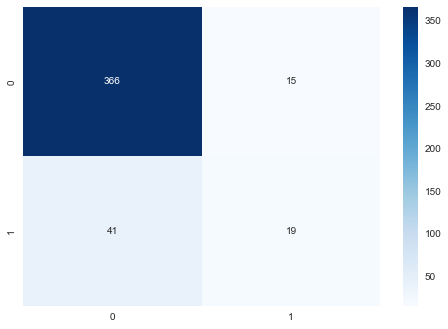

In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

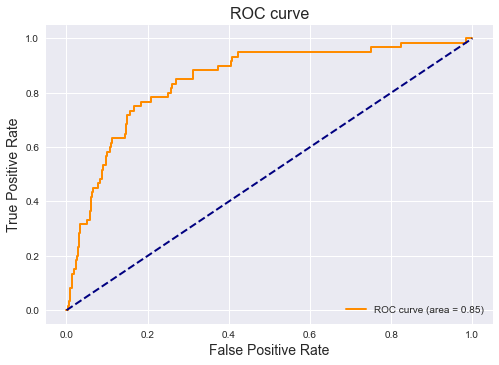

In [16]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='ROC curve (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()


# Regulaization

In [17]:
from sklearn.linear_model import LogisticRegressionCV

model = LogisticRegressionCV(Cs=10, cv=5, penalty='l2', max_iter=10000, solver='lbfgs', random_state=42) # ridge(l2-norm)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# K fold cross validation and logistic regression
scores = cross_val_score(model, X, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
print("Scores: ", scores)

Accuracy: 0.86 (+/- 0.02)
Scores:  [0.84580499 0.861678   0.85227273 0.86818182 0.86363636]


              precision    recall  f1-score   support

           0       0.89      0.97      0.93       381
           1       0.57      0.27      0.36        60

    accuracy                           0.87       441
   macro avg       0.73      0.62      0.65       441
weighted avg       0.85      0.87      0.85       441



<AxesSubplot: >

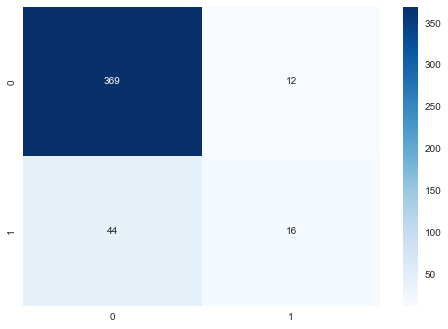

In [18]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

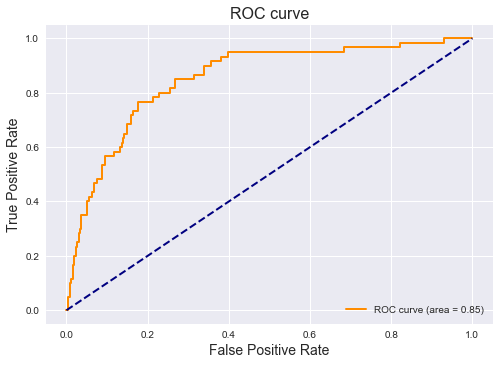

In [19]:
# ROC curve
from sklearn.metrics import roc_curve, auc

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2,
            label='ROC curve (area = {:0.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right")
plt.show()
